In [4]:
import pandas as pd #Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
Data = pd.read_csv(r'D:\data scientist\data sheet\50_Startups.csv') #check out data

In [5]:
DataPerusahaan =  pd.read_csv(r'D:\data scientist\data sheet\50_Startups.csv', usecols = ['R&D' , 'Administrasi' , 'Marketing' , 'Profit'
])

In [12]:
DataPerusahaan.head() #sneak peak data

,R&D,Administrasi,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [13]:
DataPerusahaan.shape

(50, 4)

In [14]:
DataPerusahaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
R&D             50 non-null float64
Administrasi    50 non-null float64
Marketing       50 non-null float64
Profit          50 non-null float64
dtypes: float64(4)
memory usage: 1.7 KB


In [15]:
DataPerusahaan.describe()

,R&D,Administrasi,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [16]:
DataPerusahaan.isnull().sum() #handling missing values

R&D             0
Administrasi    0
Marketing       0
Profit          0
dtype: int64

In [17]:
DataPerusahaan = DataPerusahaan.astype('int')#change float to integer

In [18]:
DataPerusahaan.head()

,R&D,Administrasi,Marketing,Profit
0,165349,136897,471784,192261
1,162597,151377,443898,191792
2,153441,101145,407934,191050
3,144372,118671,383199,182901
4,142107,91391,366168,166187


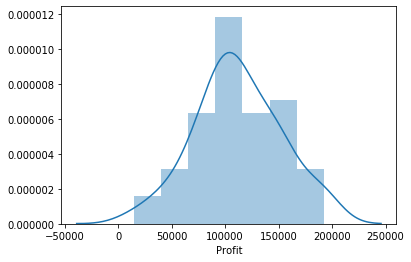

In [19]:
sns.distplot(DataPerusahaan['Profit']) #exploratory data analysis

In [6]:
DataPerusahaan.corr().style.background_gradient().set_precision(2)#correlation of them

,R&D,Administrasi,Marketing,Profit
R&D,1,0.24,0.72,0.97
Administrasi,0.24,1,-0.032,0.2
Marketing,0.72,-0.032,1,0.75
Profit,0.97,0.2,0.75,1


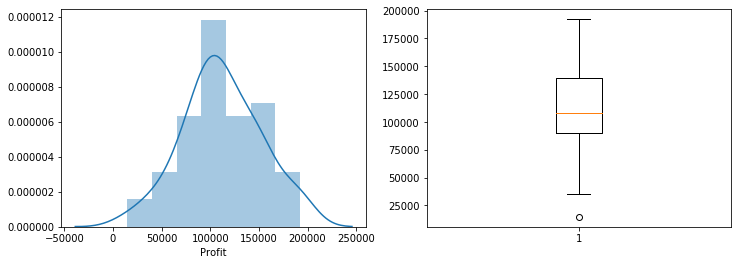

In [34]:
f = plt.figure(figsize=(12,4)) #character every columns

f.add_subplot(1,2,1)
sns.distplot(DataPerusahaan['Profit'])

f.add_subplot(1,2,2)
plt.boxplot(DataPerusahaan['Profit'])
plt.show()

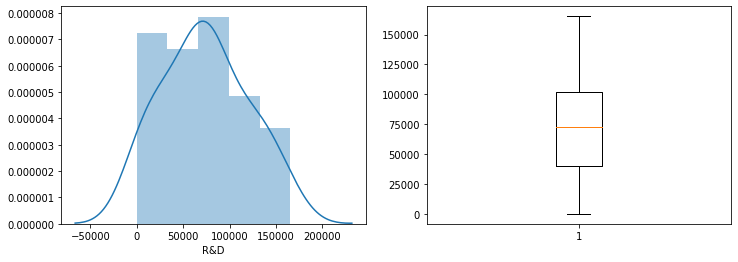

In [36]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.distplot(DataPerusahaan['R&D'])

f.add_subplot(1,2,2)
plt.boxplot(DataPerusahaan['R&D'])
plt.show()

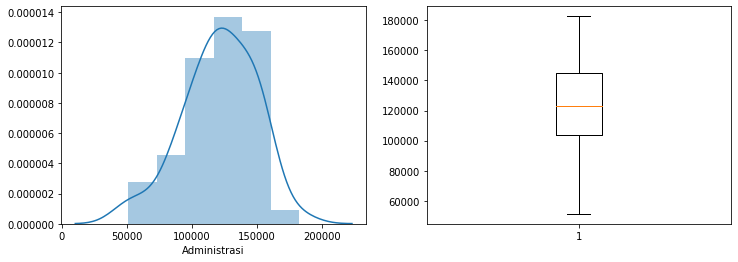

In [38]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.distplot(DataPerusahaan['Administrasi'])


f.add_subplot(1,2,2)
plt.boxplot(DataPerusahaan['Administrasi'])
plt.show()

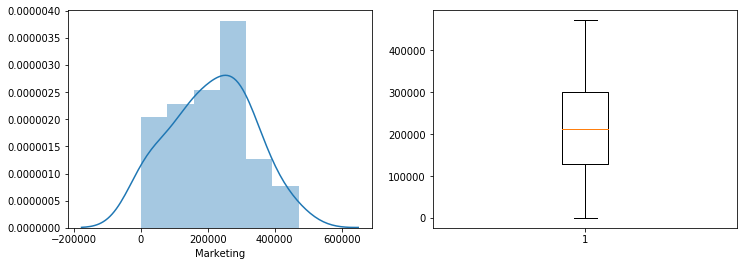

In [39]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.distplot(DataPerusahaan['Marketing'])


f.add_subplot(1,2,2)
plt.boxplot(DataPerusahaan['Marketing'])
plt.show()

C:\Users\ecos\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

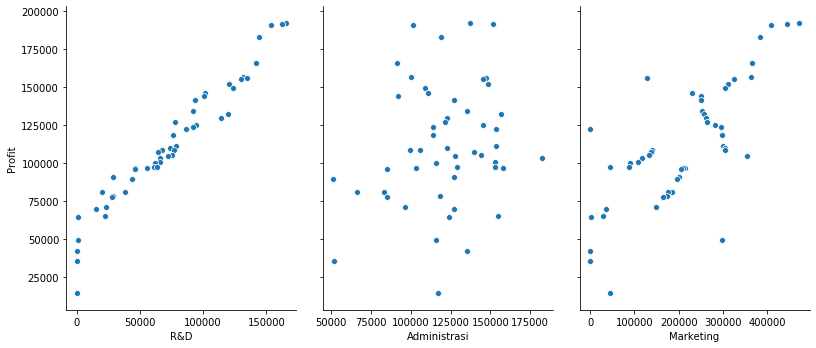

In [41]:
plt.figure(figsize=(10,8))
sns.pairplot(data=DataPerusahaan, x_vars=['R&D', 'Administrasi', 'Marketing'], y_vars=['Profit'], size=5, aspect=0.75)

In [7]:
x = DataPerusahaan[['R&D','Administrasi', 'Marketing']] #modeling
y = DataPerusahaan['Profit']

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.4 , random_state = 101)

In [9]:
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[0.81361399 0.0132271  0.0340789 ]
44203.26946443954


In [14]:
coeff_DataPerusahaan = pd.DataFrame(lin_reg.coef_,x.columns,columns=['Coefficient'])
coeff_DataPerusahaan

,Coefficient
R&D,0.813614
Administrasi,0.013227
Marketing,0.034079


In [17]:
lin_reg.score(x_test,y_test)

0.9468207882387959

In [18]:
predictions = lin_reg.predict(x_test) #predictions

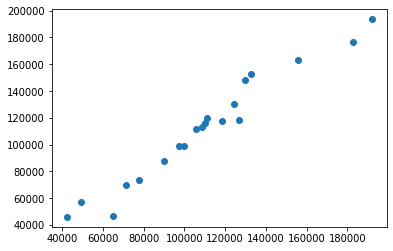

In [19]:
plt.scatter(y_test,predictions)